In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Inputs import STOPS_OUTBOUND, DIST_TRAVELED_OUT

In [4]:
# THIS IS HOW TO SHRINK GTFS STOP TIMES
routes_interest= [20]
gtfs_stop_t_df = pd.read_csv('in/raw/gtfs/stop_times.txt')
gtfs_trips_df = pd.read_csv('in/raw/gtfs/trips.txt')
gtfs_trips_df = gtfs_trips_df[gtfs_trips_df['route_id'].isin(routes_interest)]
focus_trip_ids = gtfs_trips_df['trip_id'].unique()
gtfs_stop_t_df = gtfs_stop_t_df[gtfs_stop_t_df['trip_id'].isin(focus_trip_ids)]
gtfs_stop_t_df.to_csv('in/raw/gtfs/stop_times2.txt', index=False)

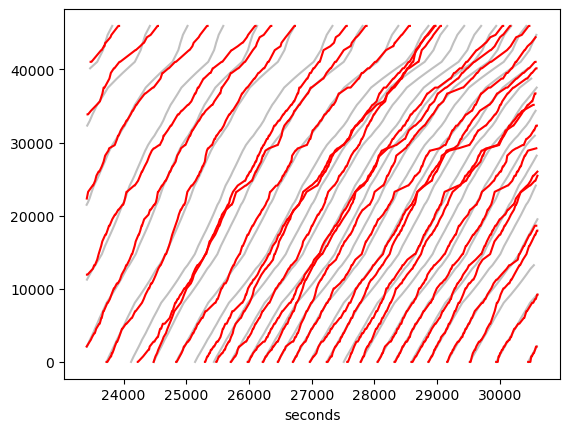

In [12]:
# THIS IS HOW TO CREATE TRAJECTORY PLOTS
df_out = pd.read_pickle('out/NC_Terminal/0616-020547-trip_record_outbound.pkl')
df_out.columns
df_arr_t = df_out[['trip_id', 'replication', 'dist_traveled', 'arr_sec']].copy()
df_arr_t = df_arr_t.rename(columns={'arr_sec': 'seconds'})
df_dep_t = df_out[['trip_id', 'replication', 'dist_traveled', 'dep_sec']].copy()
df_dep_t = df_dep_t.rename(columns={'dep_sec': 'seconds'})
df_sched_t = df_out[['trip_id', 'replication', 'dist_traveled', 'schd_sec']].copy()
df_times = pd.concat([df_arr_t, df_dep_t], axis=0, ignore_index=True)
df_times = df_times.sort_values(by=['trip_id', 'seconds'])
df_sched_t = df_sched_t.sort_values(by=['trip_id', 'schd_sec'])
replication = 2
time_period = (6.5*60*60, 8.5*60*60)
df_times_rep = df_times[df_times['replication'] == replication].copy()
df_sched_t_rep = df_sched_t[df_sched_t['replication'] == replication].copy()
df_times_rep = df_times_rep[(df_times_rep['seconds'] >= time_period[0]) & (df_times_rep['seconds'] <= time_period[1])]
df_times_rep = df_times_rep.set_index('seconds')
df_sched_t_rep = df_sched_t_rep[(df_sched_t_rep['schd_sec'] >= time_period[0]) & (df_sched_t_rep['schd_sec'] <= time_period[1])]
df_sched_t_rep = df_sched_t_rep.set_index('schd_sec')
df_sched_t_rep.groupby('trip_id')['dist_traveled'].plot(color='silver')
df_times_rep.groupby('trip_id')['dist_traveled'].plot(color='red')
plt.show()

In [11]:
df_out[(df_out['stop_sequence'] >= 66) & (df_out['replication'] == 2) & (df_out['dep_sec']<=25500)]

,bus_id,trip_id,stop_id,arr_sec,dep_sec,pax_load,ons,offs,denied,hold_time,skipped,schd_sec,stop_sequence,dist_traveled,replication
2348,898403,911900030,3954,20938.636846,20938.636846,0,0,0,0,0,0,21046.0,66,44722,2
2354,898403,911900030,8613,21045.688581,21045.688581,0,0,0,0,0,0,21120.0,67,45948,2
2452,897602,911285020,3954,22145.283145,22145.283145,3,0,0,0,0,0,22066.0,66,44722,2
2460,897602,911285020,8613,22249.079844,22258.579844,0,0,3,0,0,0,22140.0,67,45948,2
2542,899503,911000030,3954,23014.286100,23014.286100,2,0,0,0,0,0,22966.0,66,44722,2
2571,899503,911000030,8613,23326.984763,23337.915330,0,0,2,0,0,0,23040.0,67,45948,2
2625,907802,911240020,3954,23813.377911,23813.377911,2,0,0,0,0,0,23746.0,66,44722,2
2632,907802,911240020,8613,23858.918142,23869.516382,0,0,2,0,0,0,23820.0,67,45948,2
2694,907002,911381020,3954,24336.769291,24336.769291,3,0,0,0,0,0,24346.0,66,44722,2
2774,897302,911316020,3954,24919.531251,24919.531251,1,0,0,0,0,0,24946.0,66,44722,2
